In [1]:
# Importing required Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#Importing dataset
from sklearn.datasets import load_wine

In [2]:
k = 3 # defining the number of classes
tol = 0.001 #tolerance - This represents the degree of movement that is allowed for the centroids
max_iter = 300 # maximum number of iterations
colors = 10*["g","r","c","b","k",'y'] # color values to plot the graph

In [31]:
# Fit function is written to train the centroids. 
#Basically we are going to find the centroid position with the help of this function
def fit(data,k,max_iter,tol):
		
    centroids = {} # creating an empty dictionary to keep track of the centroid values
    
    for i in range(k): 
        centroids[i] = data[i] 
        # Assigning the initial centroid values based on the input data.
        #Here, since the k value is 3, the first 3 values of the data is assigned as centroid
        
    for i in range(max_iter):
        classifications = {} # creating an empty dictionary to keep track of which all points belong to which centroid.

        for i in range(k):
            classifications[i] = [] 
            # we are creating 3 empty lists for each class. 
            #The classification dictionary is going to look something like this classifications = {0:[], 1:[], 2:[]}
        for featureset in data: # We are going to go through every data point present. 

						# Here we are calculating the distance of each data point from all the three centroids 
						# and then we are finding the minimum value amongst the calculated distance. The centroid 
						# which gives us the minimum value is assigned with that data point

            distances = [np.linalg.norm(featureset-centroids[centroid]) for centroid in centroids] 
            classification = distances.index(min(distances)) 
            # This gives the index value of the position in the list, where the minimum value is present. 
            #This index value gives us the index value
            classifications[classification].append(featureset) # Appending the minimum value to the respective index value

        prev_centroids = dict(centroids) 
        # Assigning the current centroid values to a new dictionary called prev_centroid
        #as the value of the centroid is going to change
        
				# Here we are going to update the centroid value by calculating the average of
                #all the data values that are assigned to that particular class
        for classification in classifications:
            centroids[classification] = np.average(classifications[classification],axis=0)
            
        optimized = True
				
				# In this for loop we are going to calculate by what degree or by what value has the centroid moved. 
        for c in centroids: # Calculating the degree of change for each centroid 
            original_centroid = prev_centroids[c]
            current_centroid = centroids[c]
						
# the sum operation is summing up the values in the list. We have to perform the sum to basically 
# calculate the total degree of change and it becomes easy for us to compare with the tolerance value.
# This sum value is compared with the tolerance value. If the tolerance value is less than the sum,
# then the cycle is continued. 
# This cycle of operation is carried out until the sum value goes less than the tolerance value.

            if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > tol: 
                optimized = False
				
        if optimized:
            break
    return centroids, classifications

# Here we are going to predict to which a particular given data point belongs to
def predict(data,centroids):
    distances = [np.linalg.norm(data-centroids[centroid]) for centroid in centroids]
    classification = distances.index(min(distances))
    return classification  

In [32]:
# Data initialization
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
Y = pd.DataFrame(wine.target, columns=['target'])

In [33]:
# Normalization
X = (X-X.min()) / (X.max()-X.min())

# Data splitting for train and test
xtrain, xtest, ytrain, ytest = train_test_split(X,Y, test_size=0.3)

In [34]:
# choosing a feature
f1 = 'hue'
f2 = 'proline'
basex = np.array(xtrain[[f1, f2]])
basey = np.array(ytrain['target'])

xtest = np.array(xtest[[f1, f2]])
ytest = np.array(ytest['target'])

In [35]:
x = pd.DataFrame(basex)
y = basey

In [36]:
centroids, classifications = fit(basex,k,max_iter,tol)

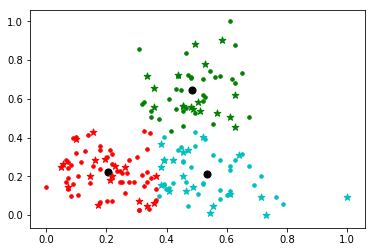

In [37]:
# Code to plot the graph below

for centroid in centroids:
    plt.scatter(centroids[centroid][0], centroids[centroid][1], marker='o', color='k', s=50)

for classification in classifications:
    color = colors[classification]
    for featureset in classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker='.', color=color, s=50)

for unknown in xtest:
    classification = predict(unknown,centroids)
    plt.scatter(unknown[0], unknown[1], marker='*', color=colors[classification], s=50)